# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
iris_df = pd.read_csv("Iris.csv")

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape #Gives the number of rows and columns in our dataset.

(150, 6)

# Gaining information from our dataset

In [5]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris_df = iris_df.drop(['Id'], axis = 1) #Dropping the auto created Index column.

In [7]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Writing a function to further inspect the dataset.

In [8]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(iris_df)

,Data Type,No of Levels,Levels
SepalLengthCm,float64,35,[5.1 4.9 4.7 4.6 5.0 5.4 4.4 4.8 4.3 5.8 5.7 5...
SepalWidthCm,float64,23,[3.5 3.0 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.0 4.4 3...
PetalLengthCm,float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.0 1.9 4.7 4.5 4...
PetalWidthCm,float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.0 1...
Species,object,3,['Iris-setosa' 'Iris-versicolor' 'Iris-virgini...


In [9]:
iris_df.info() #gives a basic overview of the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [11]:
iris_df.describe(include = 'all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [12]:
iris_df.describe() #Performs on numeric columns only.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for duplicates

In [13]:
iris_df.duplicated().sum() #Total no of duplicates in the dataset

3

In [14]:
iris_df[iris_df.duplicated()] #Trick to display the actual duplicate rows.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


There are 3 duplicate values in our dataset but removing them might disturb the balance of the dataset.

# Checking the missing values

In [15]:
iris_df.isnull().sum(axis = 0)

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Estimating Skewness and Kurtosis

In [16]:
iris_df.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

In [17]:
iris_df.kurt()

SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

# Visualising the target column

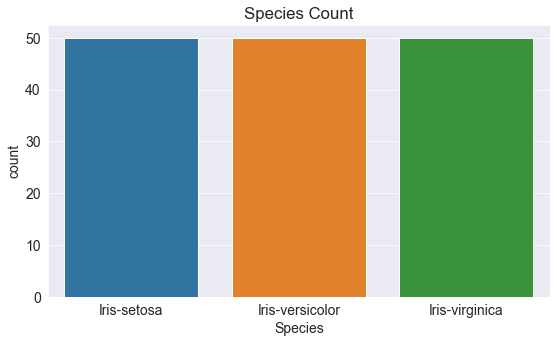

In [18]:
plt.title('Species Count')
sns.countplot(iris_df['Species']);

This is another proof that the dataset i sbalanced with equal records for the three species.

# Visualising the relations between variables.

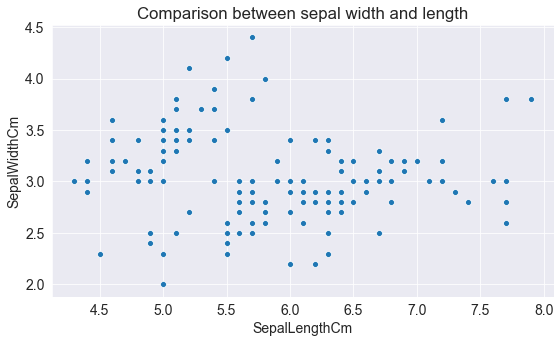

In [20]:
plt.title('Comparison between sepal width and length')
sns.scatterplot(iris_df['SepalLengthCm'], iris_df['SepalWidthCm']);

Comparison between sepal length and sepal width.

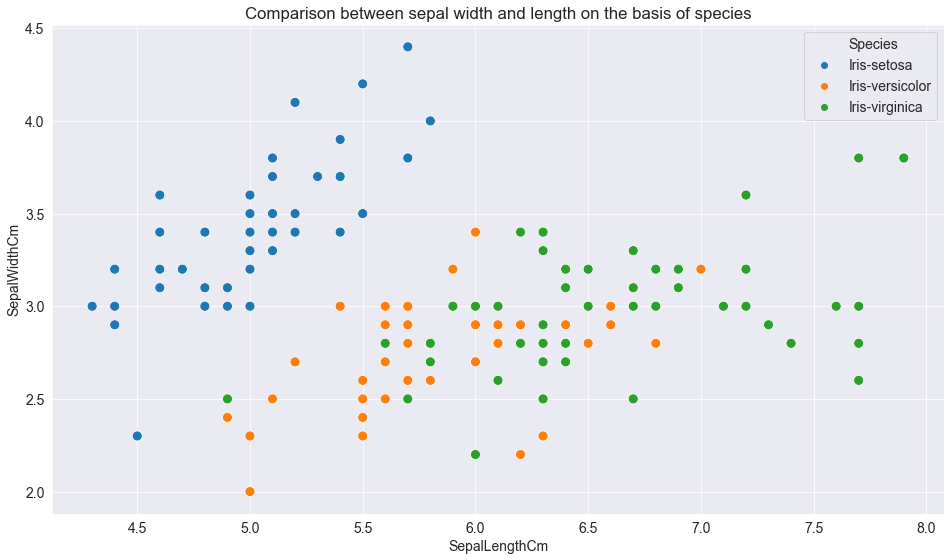

In [23]:
plt.figure(figsize=(16,9))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(iris_df['SepalLengthCm'], iris_df['SepalWidthCm'], hue = iris_df['Species'], s= 100);

This is a plot of sepal width and sepal length based on species.

We can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.

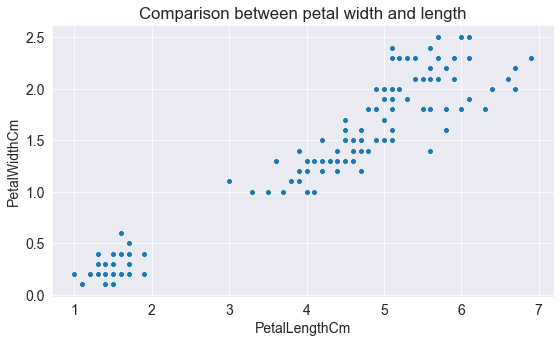

In [24]:
plt.title('Comparison between petal width and length')
sns.scatterplot(iris_df['PetalLengthCm'], iris_df['PetalWidthCm']);

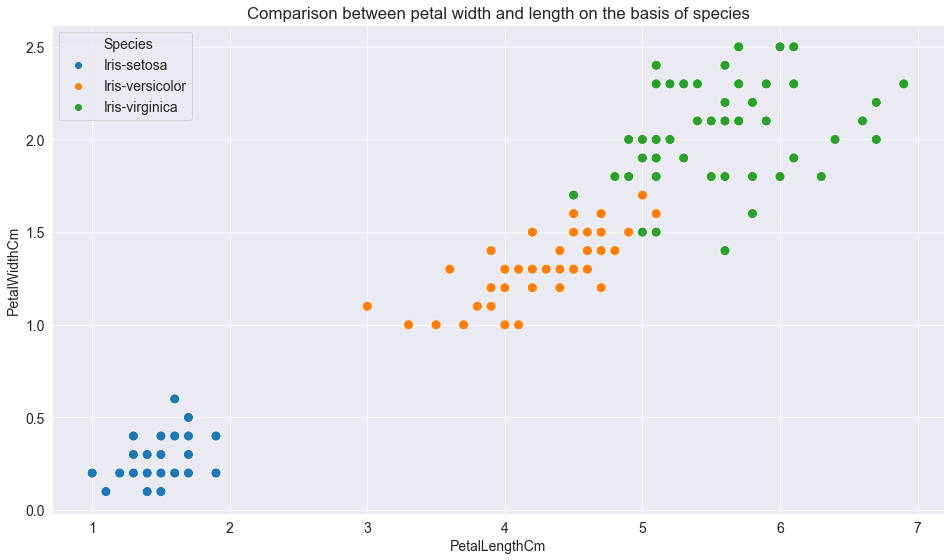

In [26]:
plt.figure(figsize=(16,9))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(iris_df['PetalLengthCm'], iris_df['PetalWidthCm'], hue = iris_df['Species'], s= 100);

We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

# Pair Plots

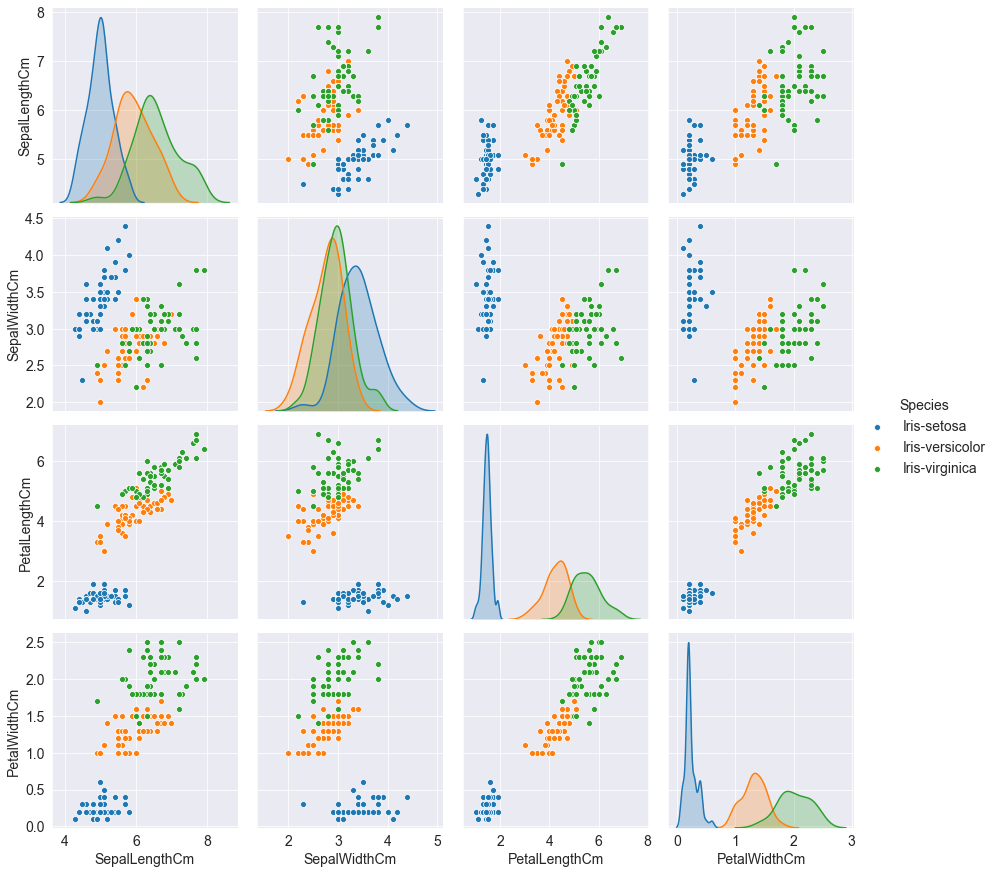

In [30]:
sns.pairplot(iris_df,hue="Species",height=3);

We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

# Differentiating NUmerical and Categorical Variables

In [9]:
categorical_columns = iris_df.dtypes[iris_df.dtypes == 'object'].index
print('No of categorical fetures:',len(categorical_columns),'\n')
print(categorical_columns)
print('*'*100)

numerical_columns = iris_df.dtypes[iris_df.dtypes != 'object'].index
print('No of numerical fetures:',len(numerical_columns),'\n')
print(numerical_columns)

No of categorical fetures: 1 

Index(['Species'], dtype='object')
****************************************************************************************************
No of numerical fetures: 4 

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


# Let's summarize the numeric columns

In [10]:
iris_df[numerical_columns].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Since the mean and median values don't have a large difference among their values, we do not have to transform our data.

# Correlation between the variables

In [11]:
iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [14]:
iris_df.corr(method = 'kendall') #using the kendall method to find the correlation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.072112,0.717624,0.654960
SepalWidthCm,-0.072112,1.000000,-0.182391,-0.146988
PetalLengthCm,0.717624,-0.182391,1.000000,0.803014
PetalWidthCm,0.654960,-0.146988,0.803014,1.000000


# Visualising the above correlation using a heatmap

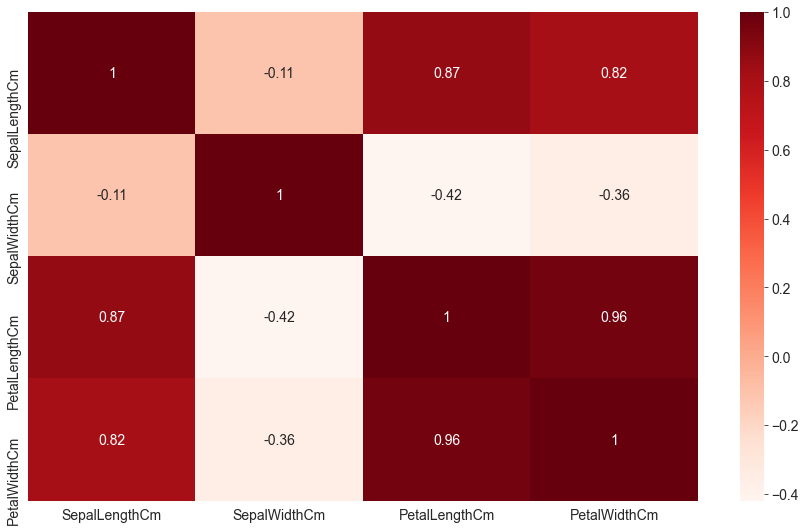

In [19]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris_df.corr(), cmap='Reds', annot = True);

We see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

Let's get some distplots

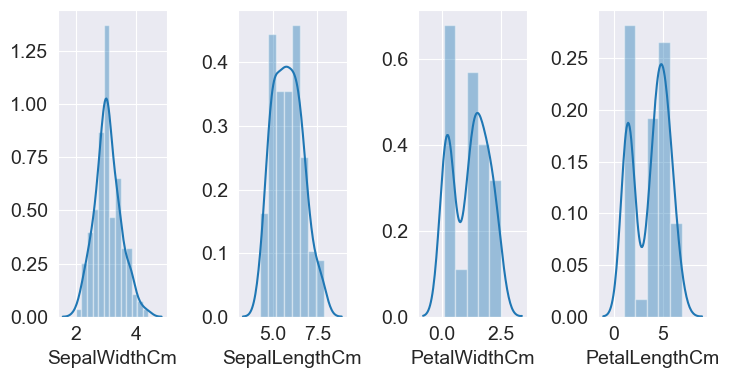

In [21]:
cols = ['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']
plt.figure(figsize=(20,4), dpi=100)
i = 1
for col in cols:
    plt.subplot(1,11,i)
    sns.distplot(iris_df[col])
    i = i+1
plt.tight_layout()
plt.show()

# Histograms

Using histograms we can see the ditribution of data for the various columns of the dataset.

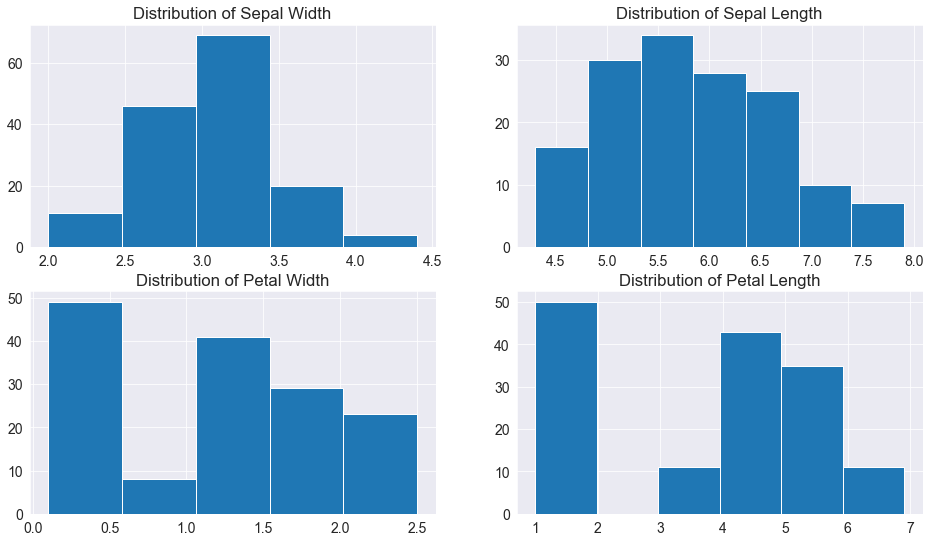

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(iris_df['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(iris_df['SepalLengthCm'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(iris_df['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(iris_df['PetalLengthCm'], bins=6);

The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.

The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.

The Highest frequency of petal width is between 0 to 0.5 which is around 50.

The Highest frequency of petal length is between 1 to 2 which is around 50.

# Univariate analysis of the columns

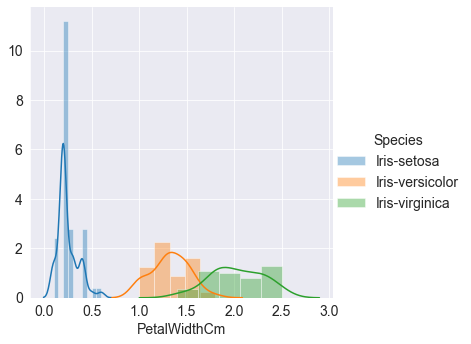

In [27]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend();

We see the setosa is easily separable while some portions of Versicolor and virginica are mixed.

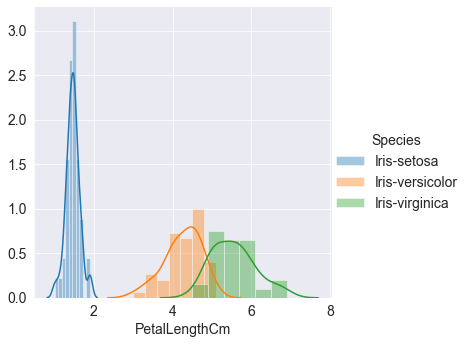

In [29]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend();

Again we see that on the basis of petal length setosa is separable while the other two are still overlapping.

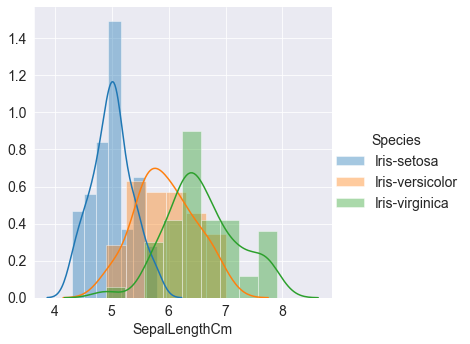

In [30]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend();

We see it is quite tough to separate the species on the basis of sepal_length alone.

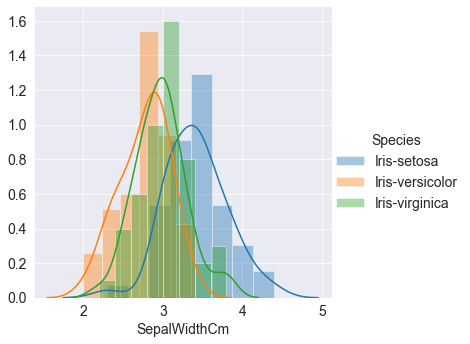

In [31]:
sns.FacetGrid(iris_df,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend();

While the overlapping of species is more intense in the case of sepal_width.

# Some Boxplots

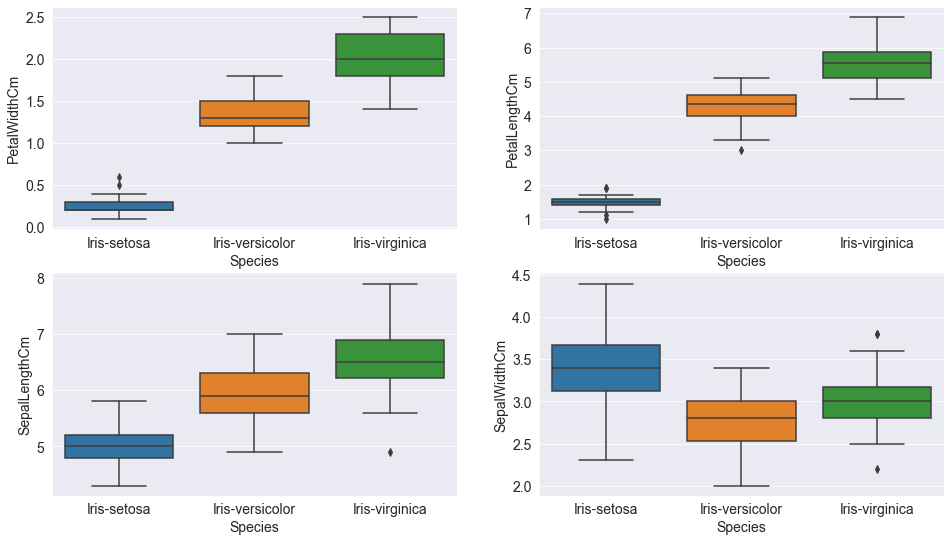

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

Further, we see that the box plots describe that the setosa usually has smaller features with few outliers.

The Versicolor species has average features

The virginica species has the longest features widths and lengths as compared to others.

# Violin Plots

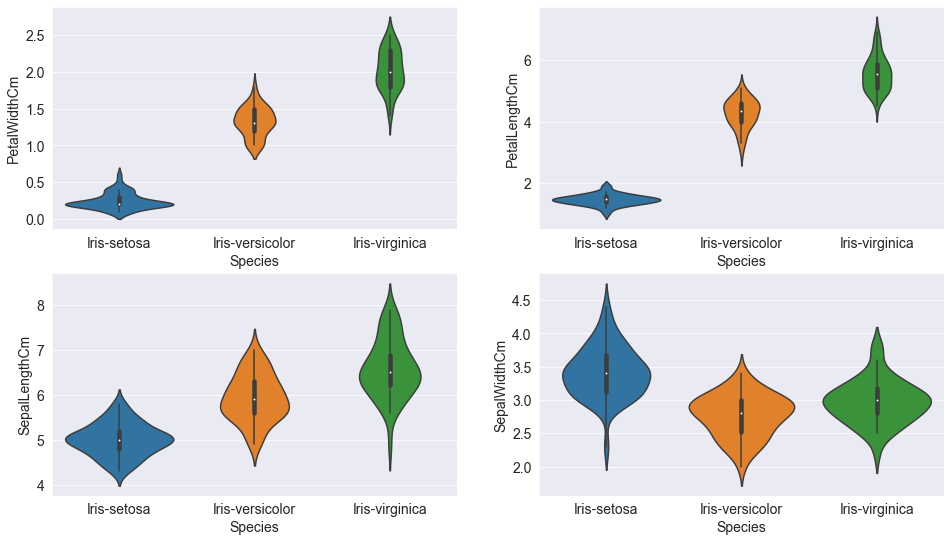

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="PetalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="PetalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="SepalLengthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="SepalWidthCm", x= "Species", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

We can see the probability density of the various features.

# Conclusion

Let's summarize the general obsevations of our dataset.

The dataset is balanced i.e. equal records are present for all three species.

We have four numerical columns while just one categorical column which in turn is our target column.

A strong correlation is present between petal width and petal length.
The setosa species is the most easily distinguishable because of its small feature size.

The Versicolor and Virginica species are usually mixed and are sometimes hard to separate, while usually Versicolor has average feature sizes and virginica has larger feature sizes.